<h2> Customer Churn with Logistic Regression </h2>

A logistic regression model from scikit-learn was trained to predict customer churn on a telecommunications dataset.

Dataset source: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')
ds.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
ds.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


To select training features, we will check the correlation values for the dataset variables. We will exclude variables having high correlation with other variables to prevent multicollinearity.

<Axes: >

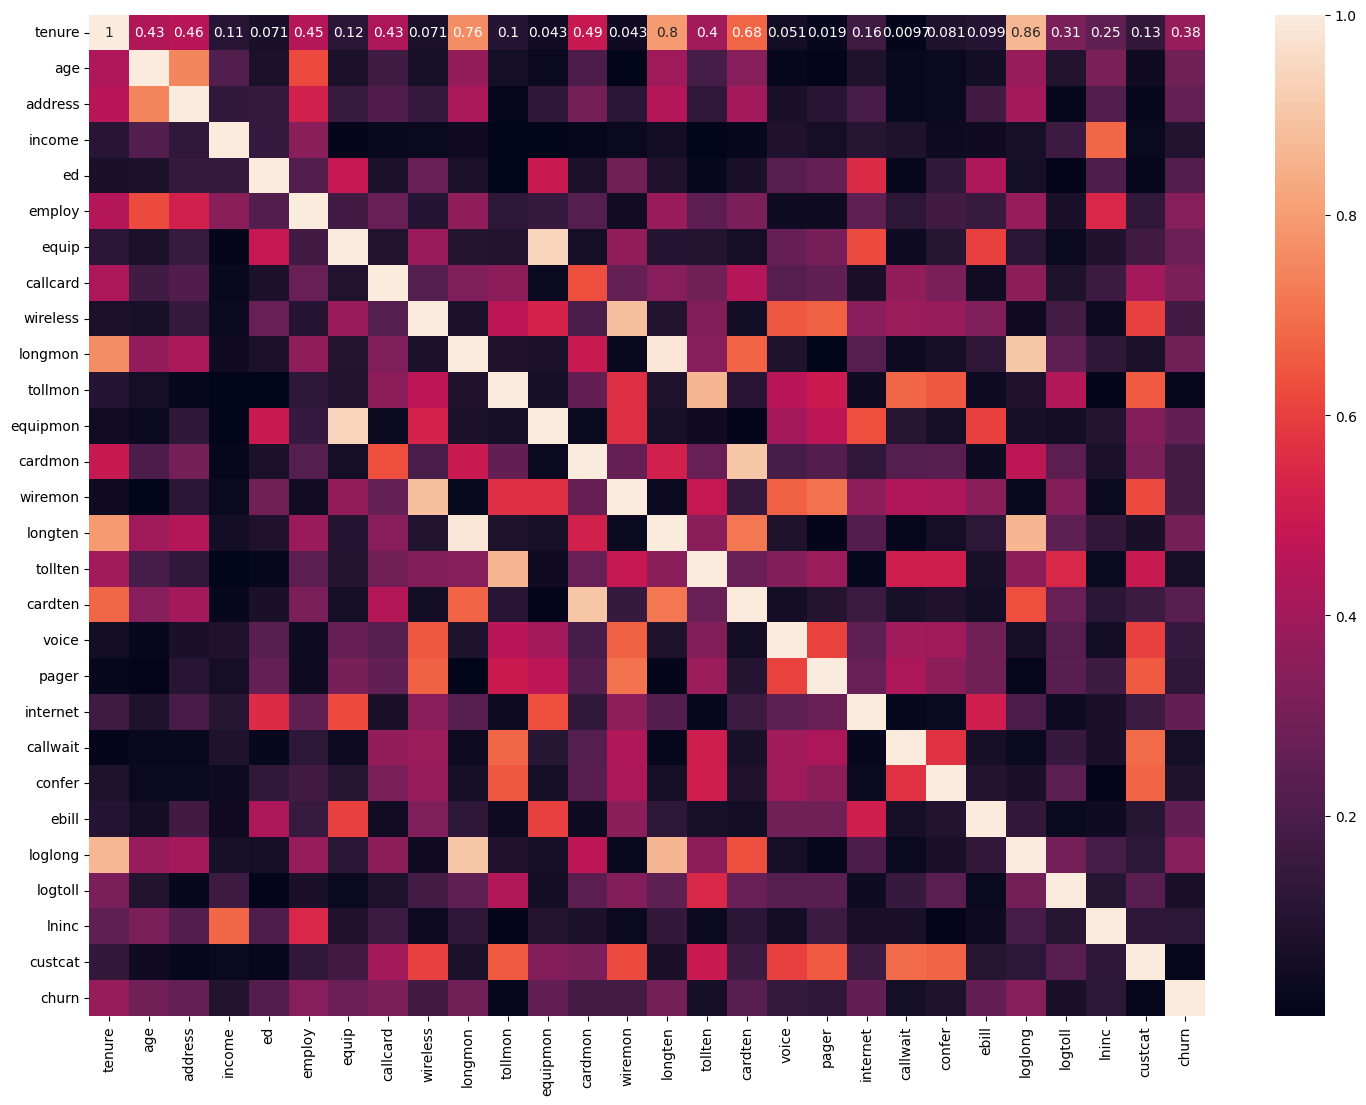

In [4]:
import seaborn as sns
plt.figure(figsize=(18,13))
sns.heatmap(ds.corr().abs(), annot=True)

In [5]:
# Training features
X = ds[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
X

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0


In [6]:
# Target variable
Y = ds['churn'].astype('int')
Y[:5]

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [7]:
# Normalization
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.85972695,
         0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.85972695,
        -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.85972695,
        -1.54590766, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.85972695,
         0.64686916, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.85972695,
         0.64686916,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.16316   ,
         0.64686916,  1.56469673]])

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=4)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((160, 9), (160,), (40, 9), (40,))

Scikit-learn's logistic regression model has multiple values for hyperparameter 'solver'. We will check performance for each value of the solver and choose the best one.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, log_loss, confusion_matrix 

solver_array = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'liblinear']
results = {}

for solver in solver_array:
    model = LogisticRegression(solver = solver, C=0.01).fit(xtrain, ytrain)
    yhat = model.predict(xtest)
    yhatprob = model.predict_proba(xtest)

    results[solver] = {'jaccard_score' : jaccard_score(ytest, yhat),
                       'log_loss': log_loss(ytest, yhatprob),
                       'confusion_matrix': confusion_matrix(ytest, yhat, labels=[0,1])}

In [10]:
results

{'lbfgs': {'jaccard_score': 0.0,
  'log_loss': 0.6197793421394149,
  'confusion_matrix': array([[25,  0],
         [15,  0]], dtype=int64)},
 'newton-cg': {'jaccard_score': 0.0,
  'log_loss': 0.619780028161234,
  'confusion_matrix': array([[25,  0],
         [15,  0]], dtype=int64)},
 'newton-cholesky': {'jaccard_score': 0.0,
  'log_loss': 0.6197797834119918,
  'confusion_matrix': array([[25,  0],
         [15,  0]], dtype=int64)},
 'sag': {'jaccard_score': 0.0,
  'log_loss': 0.6197720611039689,
  'confusion_matrix': array([[25,  0],
         [15,  0]], dtype=int64)},
 'saga': {'jaccard_score': 0.0,
  'log_loss': 0.6197180872998531,
  'confusion_matrix': array([[25,  0],
         [15,  0]], dtype=int64)},
 'liblinear': {'jaccard_score': 0.36363636363636365,
  'log_loss': 0.6155809757244557,
  'confusion_matrix': array([[18,  7],
         [ 7,  8]], dtype=int64)}}

In [11]:
best_solver = 'liblinear'

jacc = results[best_solver]['jaccard_score']
logloss = results[best_solver]['log_loss']
cm = results[best_solver]['confusion_matrix']

In [12]:
jacc

0.36363636363636365

In [13]:
logloss

0.6155809757244557

In [14]:
cm

array([[18,  7],
       [ 7,  8]], dtype=int64)

<Axes: >

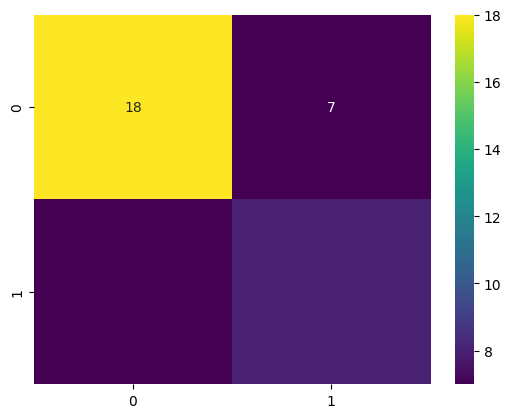

In [15]:
sns.heatmap(cm, annot=True, cmap='viridis')

In [16]:
from sklearn.metrics import classification_report

model = LogisticRegression(solver=best_solver, C=0.01).fit(xtrain, ytrain)
yhat = model.predict(xtest)
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



The best solver is 'liblinear' with f1 score = 0.65 and log loss = 0.62.